In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
%matplotlib notebook

# Universality Proof
A neural network with a single hidden layer can be used to approximate any [continuous] function.  
As the number of neurons increases the approximation error decreases.
In this visual demonstration we'll be using hidden neurons that use the sigmoid activation function.
$$ sig(x) = \frac{1}{1+e^{-x}} $$


In [3]:
def sigmoid ( input ):
    return 1. / ( 1. + np.exp( -1. * input ))

# Single Neuron Activation [ Threshold ]
By increasing the weight to the hidden unit from the input we can create a 'hard' threshold.

<IPython.core.display.Javascript object>


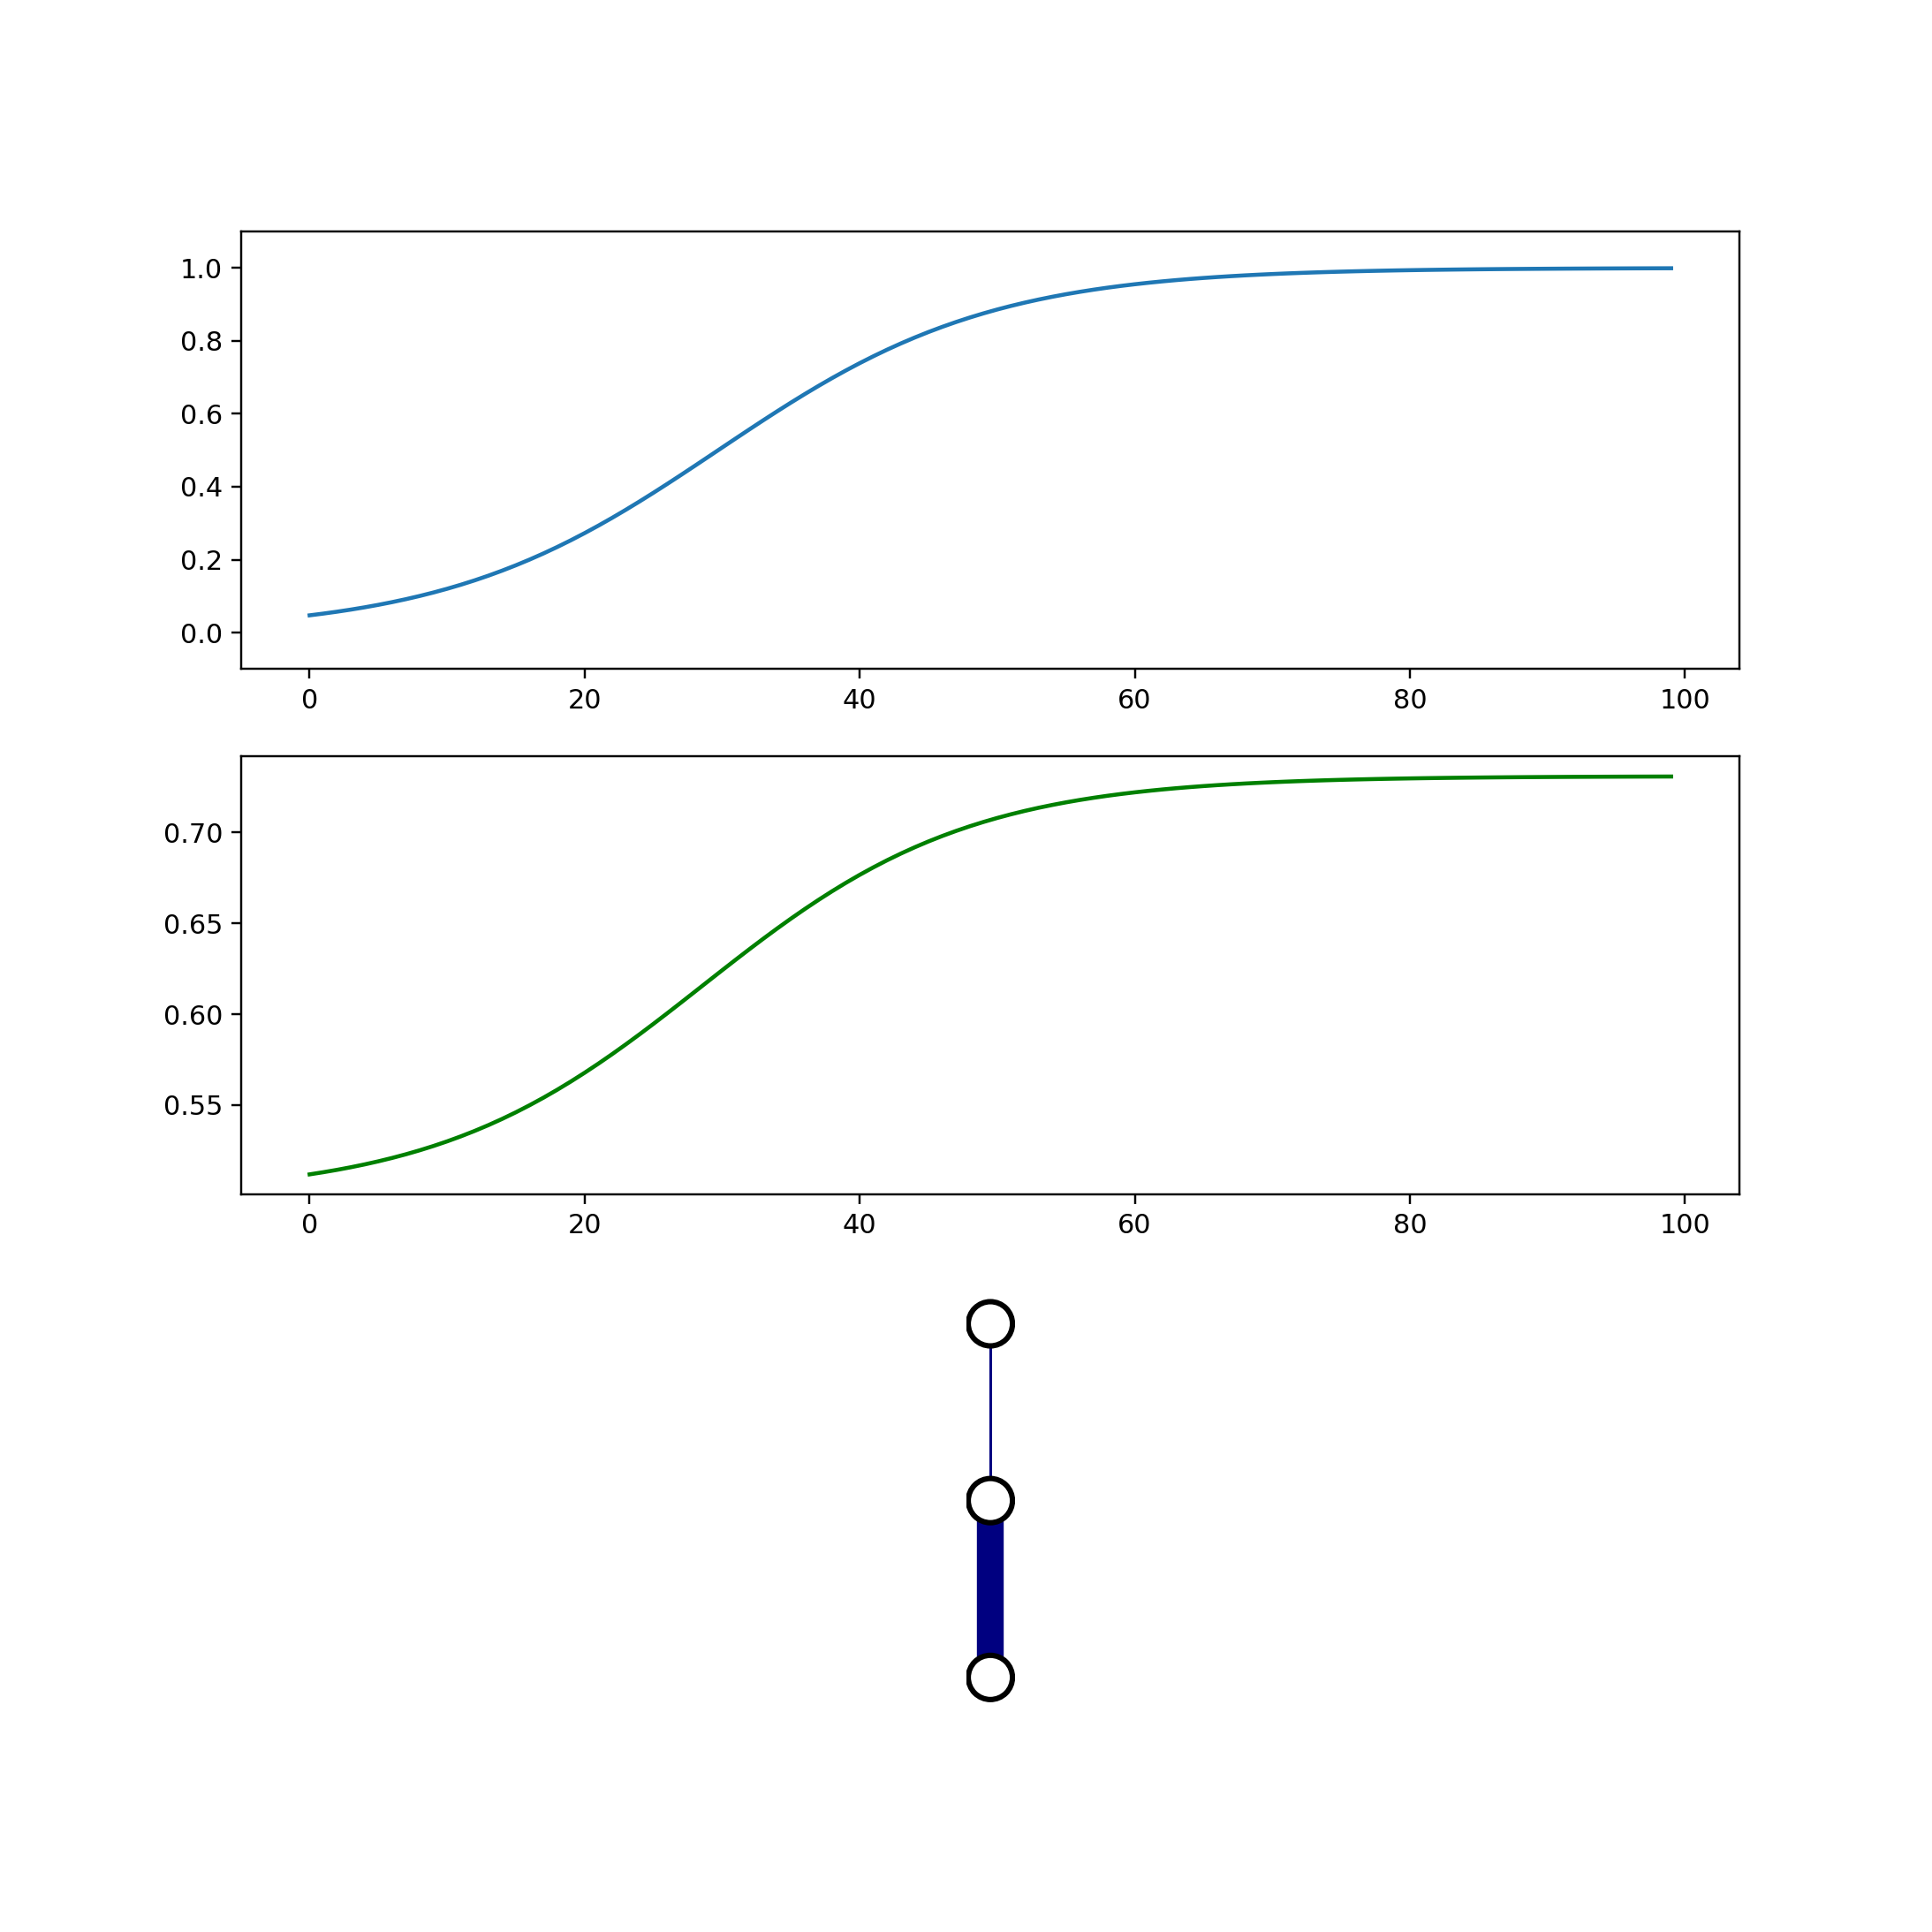

In [9]:
x = np.linspace( 0, 1, 100)
bias = 1

# input neuron
input_1 = x

# hidden neuron 1
bW_1 = -3
w_1 = 10
sum_1 = input_1 * w_1 + bias * bW_1
activation_1 = sigmoid( sum_1 )

# output neuron
bW_output = 0
w_2 = 1
sum_output = activation_1 * w_2 + bias * bW_output
output_activation = sigmoid( sum_output )

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(3,1,1); plt.ylim([-0.1,1.1])
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

ax1.plot(activation_1)
ax2.plot(output_activation, 'g')

import nnViz
network = nnViz.NeuralNetwork()
network.add_layer(1, np.array([[w_1]]))
network.add_layer(1, np.array([[w_2]]))
network.add_layer(1)
network.draw()

# Two Neurons [ Bump ]
By increasing the intial weights to the hidden layer to create hard thresholds, and creating pairs of hidden neurons that have inverse connections to the output, we are able to create 'bumps' with which we can approximate the target function. The bias neuron and its weights are used to determine the bump center.

<IPython.core.display.Javascript object>


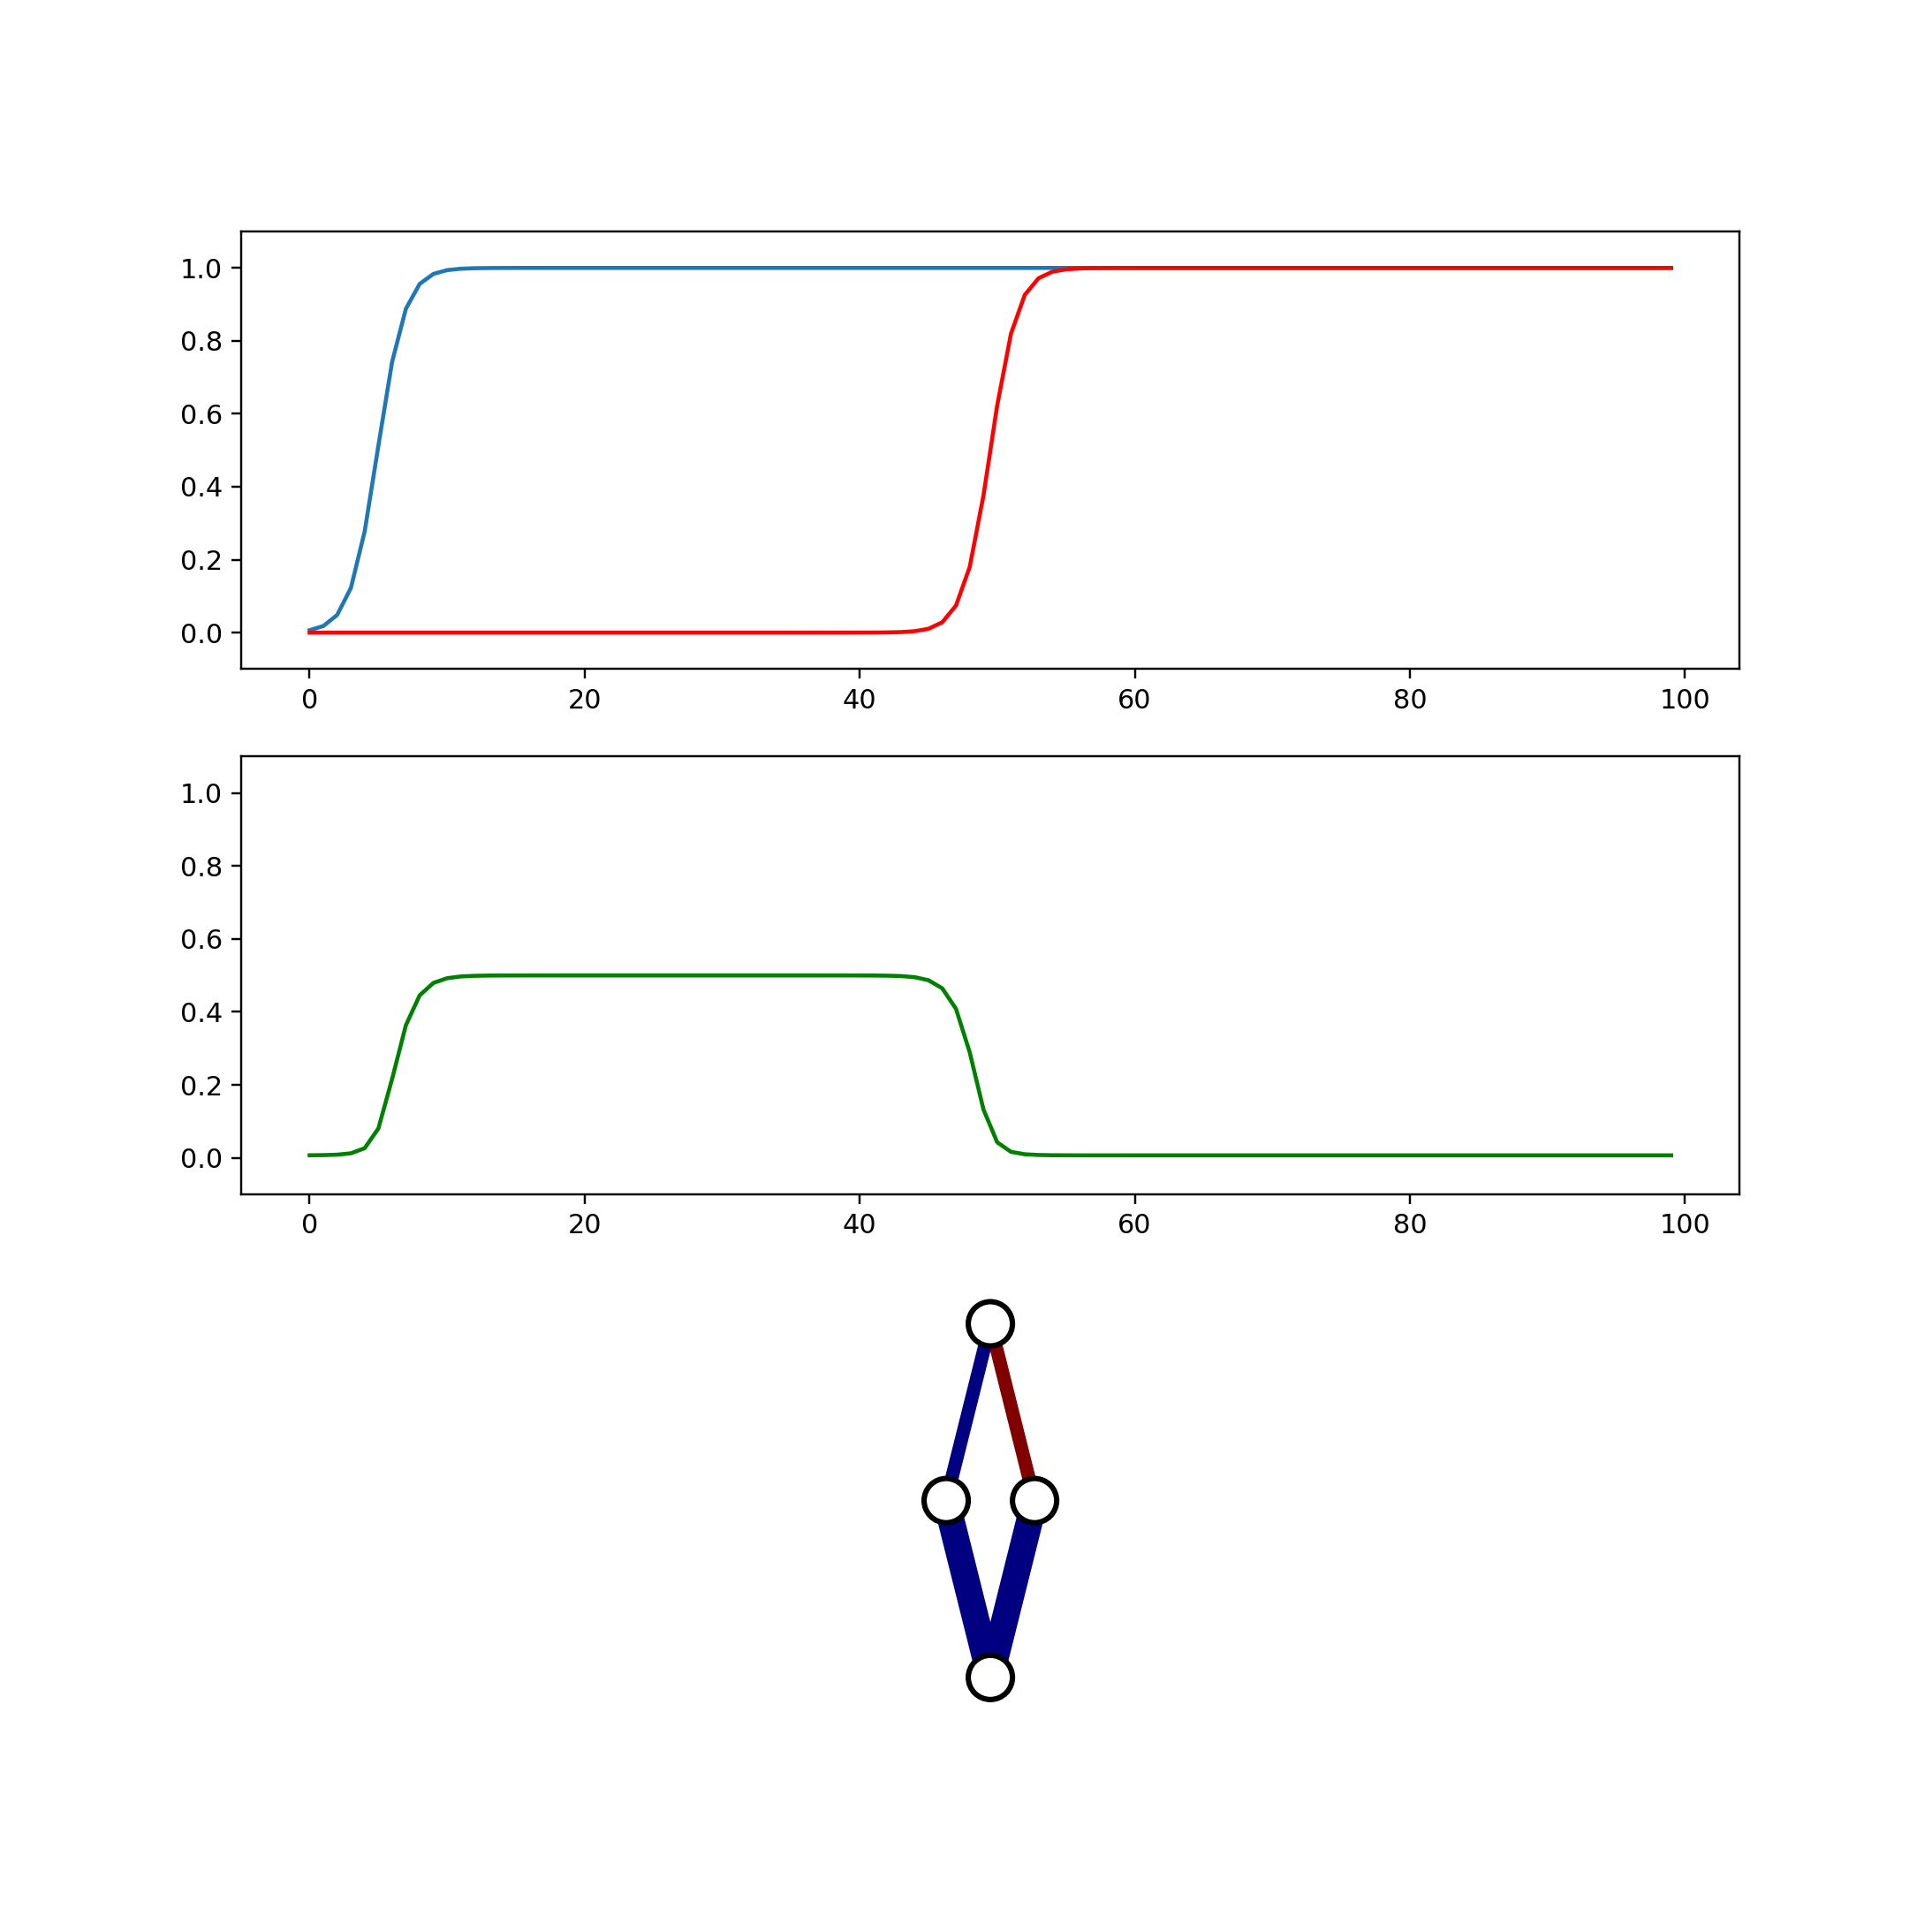

In [11]:
# input neuron
input_1 = x

# hidden neuron 1
bW_1 = -5
w_1 = 100
sum_1 = input_1 * w_1 + bias * bW_1
activation_1 = sigmoid( sum_1 )

# hidden neuron 2
bW_2 = -50
w_2 = 100
sum_2 = input_1 * w_2 + bias * bW_2
activation_2 = sigmoid( sum_2 )

# output neuron
bW_output = -5
w_3 = 5
w_4 = -5
sum_output = activation_1 * w_3 + activation_2 * w_4 + bias * bW_output
output_activation = sigmoid( sum_output )

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(3,1,1); plt.ylim([-0.1,1.1])
ax2 = plt.subplot(3,1,2); plt.ylim([-0.1,1.1])
ax3 = plt.subplot(3,1,3)

ax1.plot(activation_1); #plt.hold(True);
ax1.plot(activation_2,'r')
ax2.plot(output_activation, 'g')

import nnViz
network = nnViz.NeuralNetwork()
network.add_layer(1, np.transpose(np.array([[w_1, w_2]])))
network.add_layer(2, np.array([[w_3, w_4]]))
network.add_layer(1)
network.draw()

# Multiple Bumps
When we combine multiple neuron pairs to create non-overlapping bumps we can cover the range of the function and adjust the bump heights to approximate the function with higher accuracy.

<IPython.core.display.Javascript object>


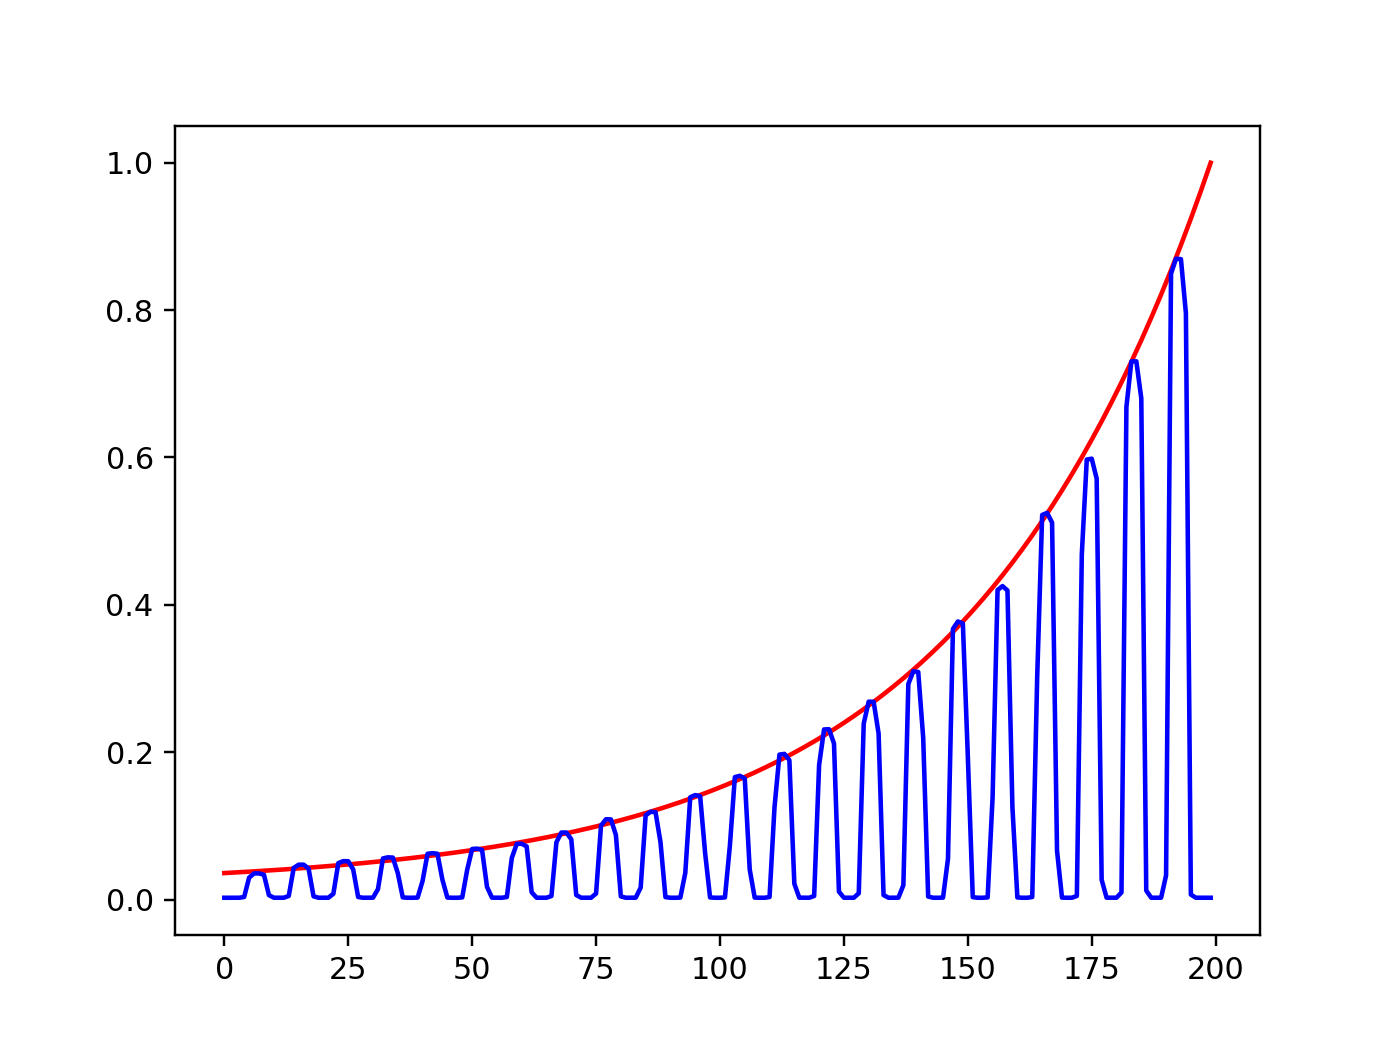

In [17]:
from ipywidgets import interact, fixed, FloatSlider
import ipywidgets as widgets
from IPython.display import display
from universalNN import universalNN

nn = universalNN()

targetFunctionText = widgets.Text(); display( targetFunctionText )
heightsText = widgets.Text(); display( heightsText )

heightsText.on_submit( nn.textUpdateHeights )
targetFunctionText.on_submit( nn.textUpdateTargetFunction )

interact( nn.updatePairs, nPairs = FloatSlider(min=1, max=22, step=1, continuous_update=False));

<IPython.core.display.Javascript object>


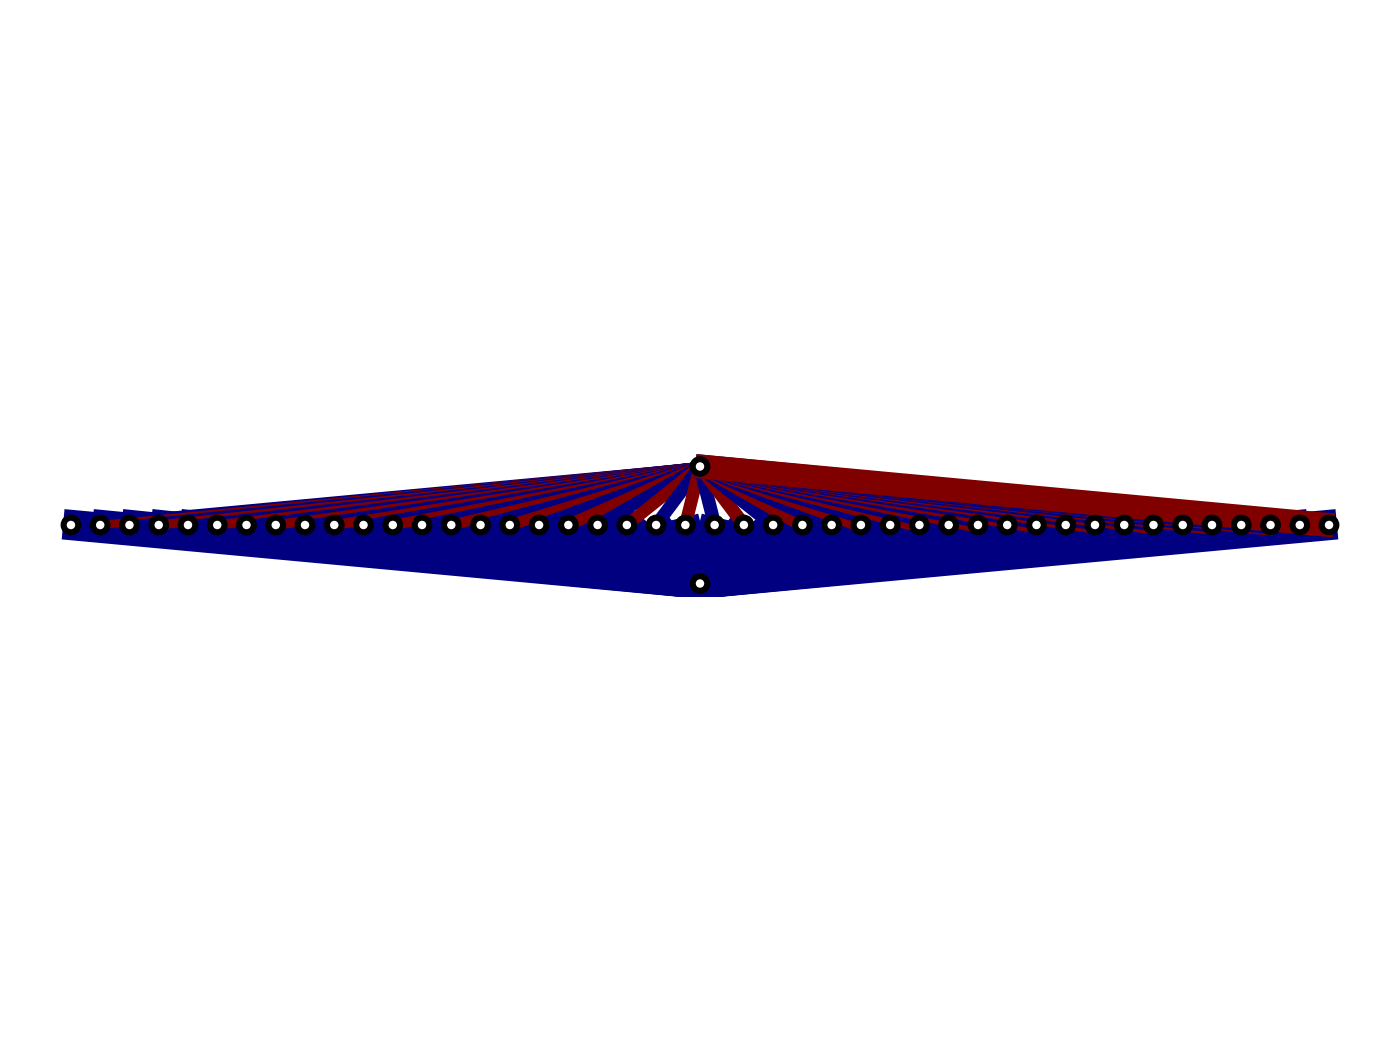

In [18]:
nn.draw_network()

In [ ]:
''' Examples '''
# np.sin(self.x*np.pi*3)
# 6.5, 7.7, 9, 11, 9, 7.7, 6.5, 6, 5, 4, 2, 2, 4, 5, 6, 6.5, 7.7, 9, 11, 9, 7.7, 6.5

# np.exp(self.x*4)
# 2.7, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.7, 3.9, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.5, 5.7, 6.1, 6.4, 7, 7.9

# np.sin(self.x*np.pi*3)+np.exp(self.x*self.x*self.x)-np.cos(self.x*10*np.pi)
# ?